## 机器学习入门之糖尿病预测——ML-sklearn
https://blog.csdn.net/weixin_43207025/article/details/94852790
https://blog.csdn.net/weixin_43207025/article/details/94852790

In [6]:
url='C:/Users/wade z shao/Documents/GitHub/Machine-Learning-with-Python/diabetes.csv'
# url='https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/diabetes.csv'
import pandas
import numpy
dataset=pandas.read_csv(url)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [11]:
outcome=dataset.groupby('Outcome').size()
outcome

Outcome
0    500
1    268
dtype: int64

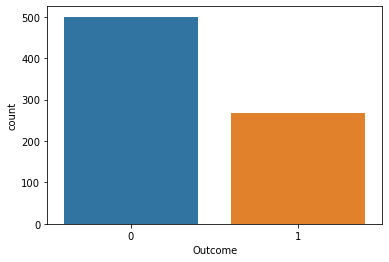

In [12]:
import seaborn
import matplotlib.pyplot as plt
seaborn.countplot(dataset['Outcome'],label="Count")
plt.savefig('001')

In [13]:
import sklearn
from sklearn.model_selection import train_test_split
dataset.info()
x_train,x_test,y_train,y_test=train_test_split(
    dataset.loc[:,dataset.columns!='Outcome'],
    dataset['Outcome'],stratify=dataset['Outcome'],
    random_state=66
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### KNN算法

In [14]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy=[]
test_accuracy=[]
neighbors_settings=range(1,11)

# select n_neighbors=0
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
print("Accuracy of K-NN classifier on training set: {:.2f}".format(knn.score(x_train, y_train)))
print("Accuracy of K-NN classifier on test set: {:.2f}".format(knn.score(x_test, y_test)))


Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.78


In [15]:
from sklearn.linear_model import LogisticRegression
# logistic regression analysis
"""
The accuracy of the model with regularization parameter C=1(default value) was 78%
the training set and 77% on the test set
"""
logreg = LogisticRegression(solver='liblinear').fit(x_train, y_train)
print("Training set score : {:.3f}".format(logreg.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(x_test, y_test)))

Training set score : 0.781
Test set score: 0.771


In [16]:
"""
When the regularization parameter C is set to 100,
the accuracy of the model on the training set is slightly improved.
but the accuracy on the test set is slightly reduced.
"""
logreg100 = LogisticRegression(C=100, solver='liblinear').fit(x_train, y_train)
print("Training set score : {:.3f}".format(logreg100.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(x_test, y_test)))


Training set score : 0.785
Test set score: 0.766


In [17]:
logreg001 = LogisticRegression(C=0.001, solver='liblinear').fit(x_train, y_train)
print("Training set score : {:.3f}".format(logreg001.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(x_test, y_test)))


Training set score : 0.686
Test set score: 0.714


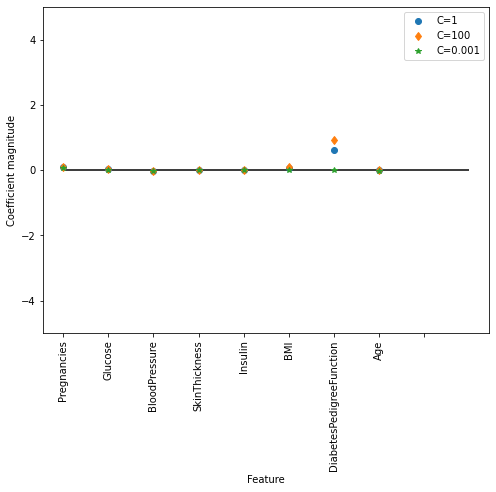

In [21]:
dataset_features = [x for i, x in enumerate(dataset.columns) if i != 8]

plt.figure(figsize=(8, 6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, 'd', label="C=100")
plt.plot(logreg001.coef_.T, '*', label="C=0.001")
plt.xticks(range(dataset.shape[1]), dataset_features, rotation=90)
plt.hlines(0, 0, dataset.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig("log_coef")


## 决策树决策树

In [22]:
from sklearn.tree import DecisionTreeClassifier
# decision tree
"""
The results show that the accuracy of the training set is 100%,
while the accuracy of the test set is only 74.1%. So the decision tree is over-fitting.
"""
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
print("\nPreliminary results of decision tree fitting:")
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuract on test set: {:.3f}".format(tree.score(x_test, y_test)))



Preliminary results of decision tree fitting:
Accuracy on training set: 1.000
Accuract on test set: 0.714


In [23]:
# setting max_depth=3, limit the depth of the tree to reduce overfitting.
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(x_train, y_train)
print("\nFinally results of decision tree fitting:")
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuract on test set: {:.3f}".format(tree.score(x_test, y_test)))
# output the feature importance
print("Feature importance:\n{}".format(tree.feature_importances_))



Finally results of decision tree fitting:
Accuracy on training set: 0.773
Accuract on test set: 0.740
Feature importance:
[0.04554275 0.6830362  0.         0.         0.         0.27142106
 0.         0.        ]


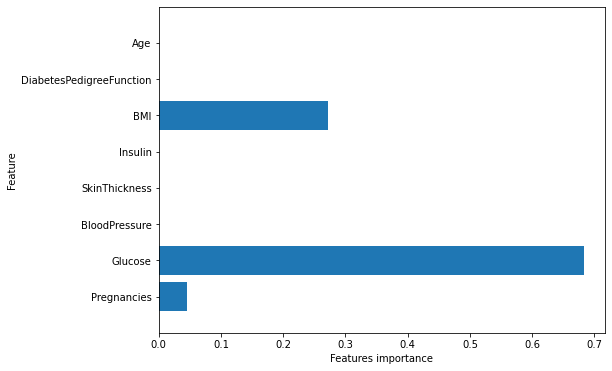

In [27]:
def plot_feature_importances_diatebes(model):
    plt.figure(figsize=(8, 6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(numpy.arange(n_features), dataset_features)
    plt.xlabel("Features importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)


plot_feature_importances_diatebes(tree)
plt.savefig("feature_importance")


### 随机森林

In [28]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
"""
A random forest of 100 trees was used to centralize the diabetes data
"""
# here I use default settings
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)
print("\nPreliminary results of decision tree fitting:")
print("Accuracy on training set: {:.3f}".format(rf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(x_test, y_test)))



Preliminary results of decision tree fitting:
Accuracy on training set: 1.000
Accuracy on test set: 0.786


In [29]:
# now, the max_depth = 3
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(x_train, y_train)
print("\nFinally results of decision tree fitting:")
print("Accuracy on training set: {:.3f}".format(rf1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(x_test, y_test)))
"""By the results we could find the accuracy is reduced"""


Finally results of decision tree fitting:
Accuracy on training set: 0.800
Accuracy on test set: 0.755


'By the results we could find the accuracy is reduced'

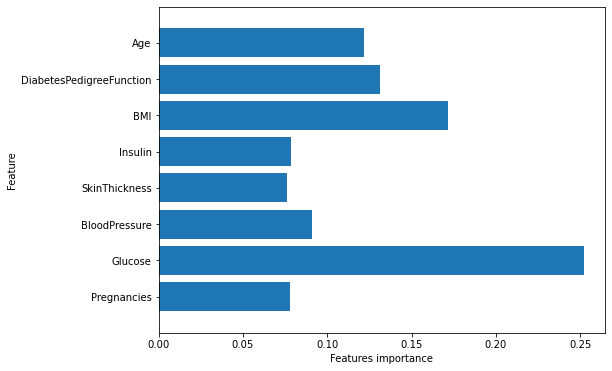

In [30]:
plot_feature_importances_diatebes(rf)
plt.savefig("feature_importance_rf")

### 梯度提升梯度提升


Preliminary results of decision tree fitting:
Accuracy on training set: 0.917
Accuracy on test set: 0.792


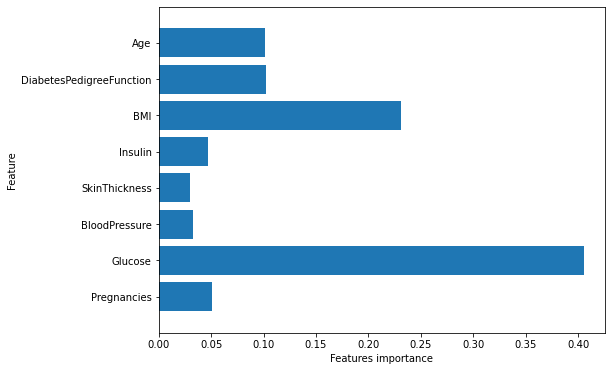

In [32]:
gb = GradientBoostingClassifier(random_state=0)
gb.fit(x_train, y_train)
print("\nPreliminary results of decision tree fitting:")
print("Accuracy on training set: {:.3f}".format(gb.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(x_test, y_test)))
plot_feature_importances_diatebes(gb)
plt.savefig("feature_importance_gb")